<a href="https://colab.research.google.com/github/adhalya/estatistica-frequencias-medidas/blob/master/Desafio_Estat%C3%ADstica_Frequ%C3%AAncias_e_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### Bibliotecas base
import pandas as pd
import numpy as np
### Bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### Bibliotecas para estatística
import scipy.stats as stat
from scipy.stats import skew

In [3]:
# Importando base de dados .json diretamente do github
df = pd.read_json("https://raw.githubusercontent.com/adhalya/estatistica-frequencias-medidas/master/enem_2023.json")

In [4]:
# Visualizando as 5 primeiras linhas da tabela
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [5]:
# Compreendendo quais tipos de dados cada coluna possui
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


1. Qual das disciplinas tem a maior amplitude de nota?

In [6]:
# Criando uma função que calcule a amplitude considerando o valor máximo e mínimo e separando nome e valor da maior amplitude
def amplitude(df):
    amplitude_valores = df.max(numeric_only=True) - df.min(numeric_only=True)
    maior_amplitude_nome = amplitude_valores.idxmax()  # Nome da coluna com a maior amplitude
    maior_amplitude_valor = amplitude_valores.max()    # Valor da maior amplitude

    # Arredondando o valor da maior amplitude
    maior_amplitude_valor_arredondado = round(maior_amplitude_valor, 2)

    # Imprime o nome e o valor da maior amplitude
    print("A maior amplitude é da disciplina", maior_amplitude_nome, "com o valor de:", maior_amplitude_valor_arredondado)

    # Chamando a função
amplitude(df)

A maior amplitude é da disciplina Redação com o valor de: 729.16


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)

In [7]:
# Calculando a média
medias = df.mean(numeric_only=True)
medias_arredondado = round(medias, 2)

# Calculando a mediana
mediana = df.median(skipna=True, numeric_only=True)
mediana_arredondado = round(mediana, 2)

# Transformando os resultados em um dataframe
df_media_mediana = pd.DataFrame({"Média": medias_arredondado, "Mediana": mediana_arredondado})

# Imprimindo o dataframe
df_media_mediana



,Média,Mediana
Linguagens,514.52,515.05
Ciências humanas,527.04,524.52
Ciências da natureza,499.32,500.48
Matemática,535.97,533.25
Redação,637.78,635.27


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso de cada uma das disciplinas ponderado é:

    a. Redação - 2

    b. Matemática e suas Tecnologias - 4

    c. Linguagens, Códigos e suas Tecnologias - 2

    d. Ciências Humanas e suas Tecnologias - 1

    e. Ciências da Natureza e suas Tecnologias - 1

    Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [8]:
pesos = {"Linguagens": 2, "Ciências humanas": 1 , "Ciências da natureza": 1, "Matemática": 4, "Redação": 2}

# Calculando a média ponderada de uma linha
def calcular_media_ponderada(linha, pesos):
    total = sum(linha[col] * pesos[col] for col in pesos.keys())  # Somando a Multiplicação de valores * Pesos
    peso_total = sum(pesos[col] for col in pesos.keys())          # Somando o Peso
    return total / peso_total # Finalizando o cálculo com a divisão

# Calculando a média ponderada de cada estudante
media_ponderada = df.apply(calcular_media_ponderada, args=(pesos,), axis=1)

# Ordena os dados pela média ponderada e seleciona os top 500
top_500 = media_ponderada.nlargest(500)

# Calcula a média e o desvio padrão das notas dos 500 estudantes mais bem colocados
media = top_500.mean()
desvio_padrao = top_500.std()

print(f"O desvio padrão dos 500 estudantes mais bem colocados é {desvio_padrao:.2f} e a média é {media:.2f}.")

O desvio padrão dos 500 estudantes mais bem colocados é 40.44 e a média é 557.29.


4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [9]:
# Calculando a média e o desvio padrão das notas dos 40 estudantes que entraram no curso de ciência da computação
media_ciencia_computacao = top_500.nlargest(40).mean() # Seleciona os 40 primeiros dos 500 da média ponderada e calcula a média
variancia_ciencia_computacao = top_500.nlargest(40).var() # Seleciona os 40 primeiros dos 500 da média ponderada e calcula a variância

print(f"A variância da nota dos 40 alunos que ingressaram em Ciência da Computação é de {variancia_ciencia_computacao:.2f} e a média da nota é de {media_ciencia_computacao:.2f}.")

A variância da nota dos 40 alunos que ingressaram em Ciência da Computação é de 295.77 e a média da nota é de 636.68.


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [10]:
# Calculando o 3º quartil com o método quantile
terceiro_q_matematica = df["Matemática"].quantile(0.75)
terceiro_q_linguagens = df["Linguagens"].quantile(0.75)

# Imprimindo o teto do 3º quartil, ou seja o valor inteiro mais próximo:D
print(f"O teto do terceiro quartil da disciplina de Matemática é {terceiro_q_matematica:.0f}.")
print(f"O teto do terceiro quartil da disciplina de Linguagens é {terceiro_q_linguagens:.0f}.")

O teto do terceiro quartil da disciplina de Matemática é 593.
O teto do terceiro quartil da disciplina de Linguagens é 572.


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

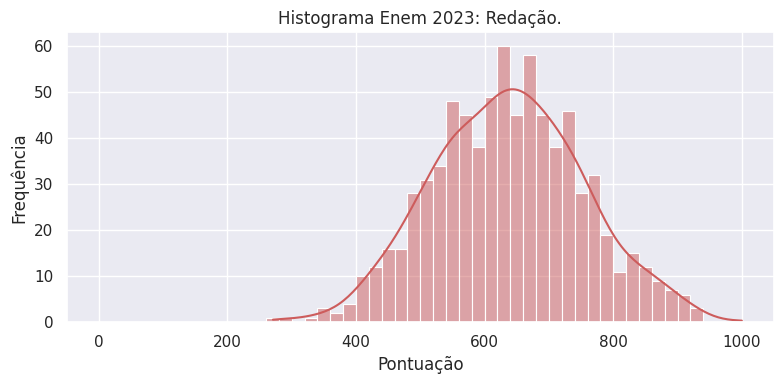

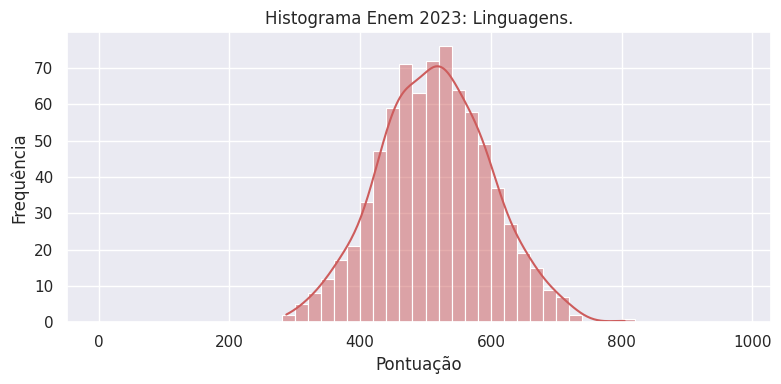

A distribuição dos dados parece ser aproximadamente simétrica, com valores distribuídos de forma relativamente uniforme em torno do centro do histograma.


In [11]:
# Removendo valores ausentes das colunas Redação e Linguagens
colunas = df[["Redação", "Linguagens"]].dropna()

# Carregando o tema do seaborn
sns.set_theme()

# Plotando histogramas para as colunas Redação e Linguagens
for coluna in colunas.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(colunas[coluna], bins=range(0, 1000, 20), kde=True, color='indianred')
    plt.xlabel("Pontuação")
    plt.ylabel("Frequência")
    plt.title(f"Histograma Enem 2023: {coluna}.")
    plt.tight_layout()
    plt.show()

print("A distribuição dos dados parece ser aproximadamente simétrica, com valores distribuídos de forma relativamente uniforme em torno do centro do histograma.")

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

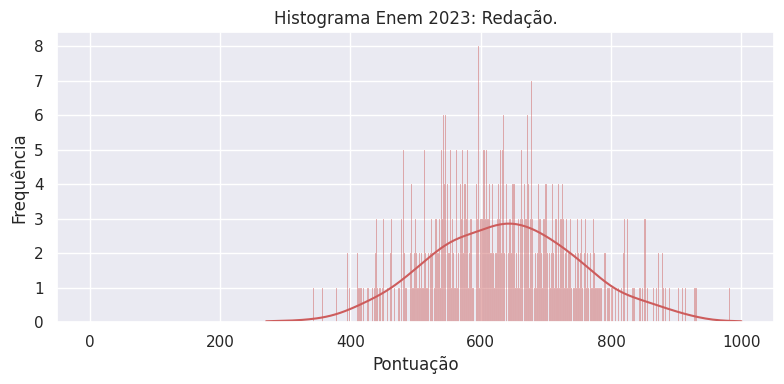

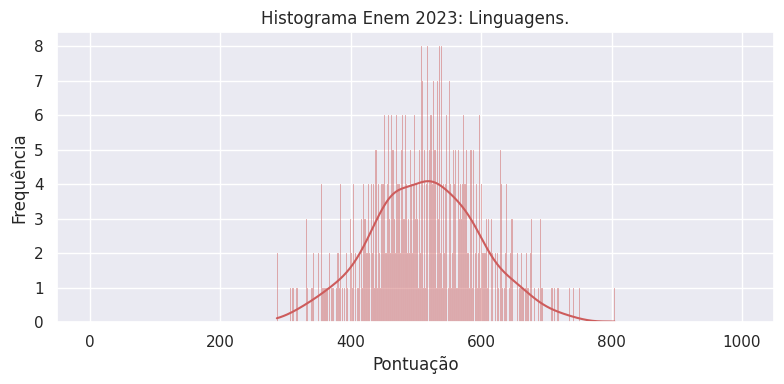

In [12]:
# Carregando o tema do seaborn
sns.set_theme()

# Calculando a assimetria de cada coluna
for coluna in colunas.select_dtypes(include=np.number).columns:
    # Plotando a imagem na dimensão 800 x 400
    plt.figure(figsize=(8, 4))
    sns.histplot(df[coluna], bins=range(0, 1000), kde=True, color='indianred')
    plt.xlabel("Pontuação")
    plt.ylabel("Frequência")
    plt.title(f"Histograma Enem 2023: {coluna}.")

    plt.tight_layout()
    plt.show()

In [13]:
# Calcular a assimetria dos dados
assimetria_redacao = skew(colunas["Redação"])
assimetria_linguagens = skew(colunas["Linguagens"])

print(f"Assimetria da disciplina de Redação: {assimetria_redacao:.2f}")
print(f"Assimetria da disciplina de Linguagens: {assimetria_linguagens:.2f}")

print("Visualmente os dados parecem simétricos mas possuem uma leve assimetria a direita para as disciplinas Redação e Linguagens")

Assimetria da disciplina de Redação: 0.05
Assimetria da disciplina de Linguagens: 0.06
Visualmente os dados parecem simétricos mas possuem uma leve assimetria a direita para as disciplinas Redação e Linguagens


8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

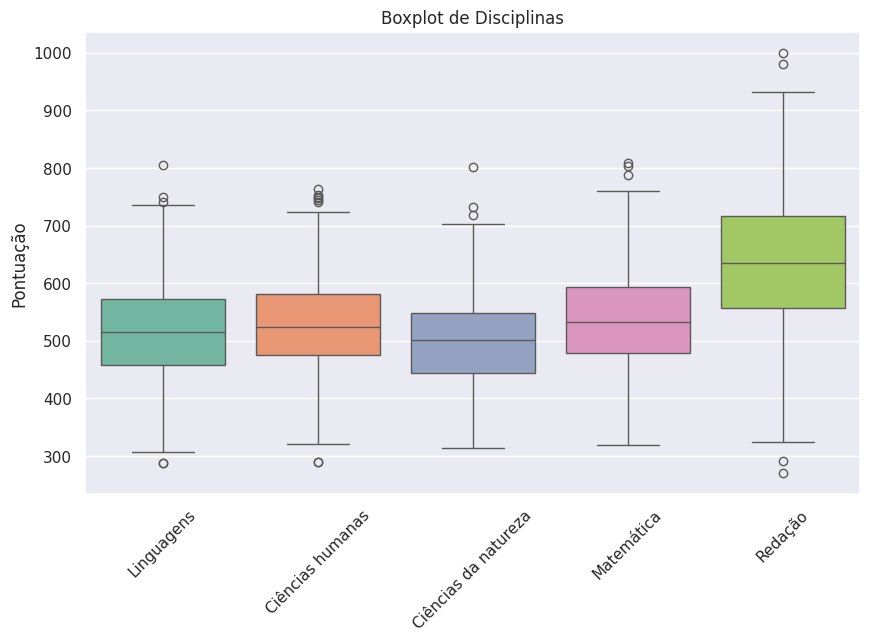


Outliers:

Linguagens              5
Ciências humanas        8
Ciências da natureza    3
Matemática              3
Redação                 4
dtype: int64


In [14]:
# Selecionando todas as disciplinas
disciplinas = df.iloc[:, :5]

# Definindo o parâmetro de quartis de cada disciplina
q1 = disciplinas.quantile(0.25)
q2 = disciplinas.quantile(0.5)
q3 = disciplinas.quantile(0.75)

# Calculando o Intervalo Interquartil (IQR) para cada disciplina
iqr = q3 - q1

# Calculando os limites para identificar outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificando outliers para cada disciplina
outliers = (disciplinas < limite_inferior) | (disciplinas > limite_superior)

# Criando um boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=disciplinas, palette="Set2")
plt.title("Boxplot de Disciplinas")
plt.ylabel("Pontuação")
plt.xticks(rotation=45)
plt.show()

# Exibindo a quatidade de outliers para cada discplina
print("\nOutliers:\n")
print(outliers.sum())

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)

In [15]:
# Removendo outliers
df_sem_outliers = disciplinas[(disciplinas >= limite_inferior) & (disciplinas <= limite_superior)].dropna()

# Calculando a média nacional antes e depois da remoção dos outliers
media_nacional_antes = disciplinas.mean(numeric_only=True)
media_nacional_depois = df_sem_outliers.mean(numeric_only=True)


# Verificando a diferença percentual na média nacional
diferenca_percentual = ((media_nacional_depois - media_nacional_antes) / media_nacional_antes) * 100

print(" - Média nacional ANTES da remoção de outliers:\n", media_nacional_antes, "\n")
print(" - Média nacional DEPOIS da remoção de outliers:\n",media_nacional_depois, "\n")
print(" - Diferença percentual na média nacional:\n",diferenca_percentual, "\n")

# Verificando se a diferença percentual é significativa
if diferenca_percentual.any() > 5:
    print("\n*** A remoção dos outliers altera a média nacional significativamente.")
else:
    print("\n*** A remoção dos outliers não altera a média nacional significativamente pois não ultrapassa o valor de 5% das disciplinas.")

 - Média nacional ANTES da remoção de outliers:
 Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64 

 - Média nacional DEPOIS da remoção de outliers:
 Linguagens              517.148584
Ciências humanas        527.454289
Ciências da natureza    501.277468
Matemática              535.736223
Redação                 640.816727
dtype: float64 

 - Diferença percentual na média nacional:
 Linguagens              0.509941
Ciências humanas        0.078174
Ciências da natureza    0.392915
Matemática             -0.042808
Redação                 0.475584
dtype: float64 


*** A remoção dos outliers não altera a média nacional significativamente pois não ultrapassa o valor de 5% das disciplinas.


10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

In [16]:
# Calculando a média, moda e mediana dos dados originais
media_original = disciplinas.mean()
moda_original = disciplinas.mode().iloc[0]
mediana_original = disciplinas.median()

# Substituindo os valores nulos por média, moda e mediana
df_media = disciplinas.fillna(media_original)
df_moda = disciplinas.fillna(moda_original)
df_mediana = disciplinas.fillna(mediana_original)

# Calculando a média geral e o desvio padrão para cada cenário
media_media = df_media.mean()
media_desvio_padrao_media = df_media.std()

media_moda = df_moda.mean()
media_desvio_padrao_moda = df_moda.std()

media_mediana = df_mediana.mean()
media_desvio_padrao_mediana = df_mediana.std()

# Comparando as alterações na média geral e no desvio padrão
alteracao_media_media = abs((media_media - media_original) / media_original) * 100
alteracao_desvio_padrao_media = abs((media_desvio_padrao_media - disciplinas.std()) / disciplinas.std()) * 100

alteracao_media_moda = abs((media_moda - media_original) / media_original) * 100
alteracao_desvio_padrao_moda = abs((media_desvio_padrao_moda - disciplinas.std()) / disciplinas.std()) * 100

alteracao_media_mediana = abs((media_mediana - media_original) / media_original) * 100
alteracao_desvio_padrao_mediana = abs((media_desvio_padrao_mediana - disciplinas.std()) / disciplinas.std()) * 100

# Comparando as alterações na média geral e no desvio padrão
print("Diferença da média geral e desvio padrão ao substituir valores nulos por:\n")
print("Média:\n")
print("  - Alteração na média geral:\n", alteracao_media_media)
print("  - Alteração no desvio padrão:\n", alteracao_desvio_padrao_media, "\n")
print("Moda:\n")
print("  - Alteração na média geral:\n", alteracao_media_moda)
print("  - Alteração no desvio padrão:\n", alteracao_desvio_padrao_moda, "\n")
print("Mediana:\n")
print("  - Alteração na média geral:\n", alteracao_media_mediana)
print("  - Alteração no desvio padrão:\n", alteracao_desvio_padrao_mediana)
print("\n*** Substituir os valores nulos(NaN) pela MEDIANA alteraria menos a média geral e o desvio padrão.")


Diferença da média geral e desvio padrão ao substituir valores nulos por:

Média:

  - Alteração na média geral:
 Linguagens              2.209550e-14
Ciências humanas        2.157072e-14
Ciências da natureza    1.138427e-14
Matemática              0.000000e+00
Redação                 0.000000e+00
dtype: float64
  - Alteração no desvio padrão:
 Linguagens              5.295359
Ciências humanas        3.256218
Ciências da natureza    9.235259
Matemática              3.879039
Redação                 7.271371
dtype: float64 

Moda:

  - Alteração na média geral:
 Linguagens              4.554699
Ciências humanas        2.879675
Ciências da natureza    6.517951
Matemática              3.065232
Redação                 8.054786
dtype: float64
  - Alteração no desvio padrão:
 Linguagens              25.509649
Ciências humanas        22.183938
Ciências da natureza    27.437699
Matemática              16.679957
Redação                 44.211353
dtype: float64 

Mediana:

  - Alteração na média 